## IMPORT LIBRARIES


In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_predict
import warnings
warnings.filterwarnings('ignore')
sns.set_theme()


### LOAD DATASET AND MERGE CSV FILES


#### IMPORTING THREE CSV FILES FOR THIS PROJECT

In [198]:
##Load dataset
mydata = pd.read_csv("traindemographics.csv")
mydata.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


#### Load the second csv file

In [199]:
mydata1 = pd.read_csv("trainperf.csv")
mydata1.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [10]:
mydata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


### MERGE THE CSV FILES TOGETHER

In [200]:
df = pd.merge(mydata1, mydata, on='customerid', how='left')


In [67]:
df

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good,1985-08-23 00:00:00.000000,Savings,3.885298,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good,1984-09-18 00:00:00.000000,Other,11.139350,10.292041,EcoBank,NaN,Permanent,NaN
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good,1977-10-10 00:00:00.000000,Savings,3.985770,7.491708,First Bank,NaN,Permanent,NaN
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good,1986-09-07 00:00:00.000000,Other,7.457913,9.076574,GT Bank,NaN,Permanent,Primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4371,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42.000000,2017-07-30 08:18:30.000000,10000.0,13000.0,30,NaN,Bad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4372,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47.000000,2017-07-27 14:35:40.000000,10000.0,13000.0,30,NaN,Bad,1989-12-04 00:00:00.000000,Savings,4.607358,8.460608,FCMB,NaN,Permanent,NaN
4373,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57.000000,2017-07-25 15:24:47.000000,10000.0,11500.0,15,NaN,Bad,1989-11-21 00:00:00.000000,Savings,3.976842,7.409129,First Bank,NaN,Permanent,NaN
4374,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27.000000,2017-07-14 12:50:21.000000,10000.0,13000.0,30,8a858eda5c8863ff015c9dead65807bb,Bad,1990-06-11 00:00:00.000000,Savings,3.986089,7.386796,Skye Bank,NaN,Permanent,NaN


### Descriptive analysis

In [5]:
##summary of the categorical variables
df.describe(include=[object]) 

,customerid,approveddate,creationdate,referredby,good_bad_flag,birthdate,bank_account_type,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
count,4376,4376,4376,589,4376,3277,3277,3277,33,2784,443
unique,4368,4362,4364,521,2,2638,3,18,31,6,4
top,8a858f1e5baffcc9015bb02b505f180d,2017-07-18 05:29:21.000000,2017-07-18 10:54:53.000000,8a858fc55b2548dd015b286e452c678c,Good,1984-12-22 00:00:00.000000,Savings,GT Bank,OGBA,Permanent,Graduate
freq,2,2,2,8,3423,4,2578,1210,3,2348,321


In [6]:
##summary of the numerical variables
df.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays,longitude_gps,latitude_gps
count,4.376000e+03,4376.000000,4376.000000,4376.000000,4376.000000,3277.000000,3277.000000
mean,3.019810e+08,5.169333,17803.930530,21252.565288,29.266453,4.534611,7.292799
std,1.342393e+04,3.652679,10749.041391,11943.706857,11.513424,7.916626,3.268758
min,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000,-118.247009,-33.868818
25%,3.019691e+08,2.000000,10000.000000,13000.000000,30.000000,3.354984,6.473645
50%,3.019801e+08,4.000000,10000.000000,13000.000000,30.000000,3.587546,6.625954
75%,3.019935e+08,7.000000,20000.000000,24500.000000,30.000000,6.478157,7.429882
max,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000,151.209290,71.228069


### DATA CLEANING AND PREPROCESSING

In [201]:
# Removing duplicate customerid values
df.sort_values("customerid", inplace=True)
df.drop_duplicates(subset="customerid", keep=False, inplace=True)

In [50]:
df.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby',
       'good_bad_flag', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients'],
      dtype='object')

In [202]:
# Converting the birthdate to datetime
df['birthdate'] = pd.to_datetime(df['birthdate']).dt.date

# Calculate rounded age using method 2
def age(born):
    if pd.isnull(born):
        return None
    born = datetime.datetime.strptime(str(born), '%Y-%m-%d').date()
    today = datetime.date.today()
    age = today.year - born.year - ((today.month, today.day) < (born.month, born.day))
    return round(age)  # Round the age to the nearest whole number

df['age'] = df['birthdate'].apply(age)

# Check the newly added rounded age column
print(df['age'])


435     33.0
2695    43.0
3305    44.0
3150    44.0
126      NaN
        ... 
1793    42.0
4163    35.0
3833     NaN
3620    33.0
777     33.0
Name: age, Length: 4360, dtype: float64


In [71]:
df.age.isnull().sum()

1099

In [203]:
##Fill the missing values in birthdate with the average age of customers
df['age'].fillna(df['age'].mean(), inplace=True)

In [10]:
## Check for proportion of employment status
df.employment_status_clients.value_counts(dropna=False,normalize=True)

Permanent        0.536563
NaN              0.363803
Self-Employed    0.063300
Student          0.025366
Unemployed       0.009826
Retired          0.000914
Contract         0.000229
Name: employment_status_clients, dtype: float64

##### 
This shows that 54% has permanent employment, 36% did not disclose, 63% are self employed, 25% are students, 0.9% are umemployed, 0.09% are retired and 0.02% are on contract employment

In [14]:
# check for proportion of level of education of clients
df.level_of_education_clients.value_counts(dropna=False,normalize=True)

NaN              0.898766
Graduate         0.073355
Secondary        0.014854
Post-Graduate    0.011426
Primary          0.001600
Name: level_of_education_clients, dtype: float64

##### 
This shows that 90% did not disclose, 7% are graduate, 1.4% are secondary, 1.1% are post graduate and 0.16% are primary school

In [204]:
#checking for missing values
df.isna().sum()

customerid                       0
systemloanid                     0
loannumber                       0
approveddate                     0
creationdate                     0
loanamount                       0
totaldue                         0
termdays                         0
referredby                    3775
good_bad_flag                    0
birthdate                     1099
bank_account_type             1099
longitude_gps                 1099
latitude_gps                  1099
bank_name_clients             1099
bank_branch_clients           4327
employment_status_clients     1592
level_of_education_clients    3917
age                              0
dtype: int64

#### Dealing with missing values


In [205]:
##The numerical missing values will be filled with mean while the categorical missing values will be filled with the mode

#categorical missing values
columns_to_fill = ['bank_account_type', 'bank_name_clients', 'bank_branch_clients', 'employment_status_clients', 'level_of_education_clients']

for column in columns_to_fill:
        df['bank_name_clients'] = df['bank_name_clients'].fillna(df['bank_name_clients'].mode()[0])
        df['bank_branch_clients'] = df['bank_branch_clients'].fillna(df['bank_branch_clients'].mode()[0])
        df['bank_account_type'] = df['bank_account_type'].fillna(df['bank_account_type'].mode()[0])
        df['employment_status_clients'] = df['employment_status_clients'].fillna(df['employment_status_clients'].mode()[0])
        df['level_of_education_clients'] = df['level_of_education_clients'].fillna(df['level_of_education_clients'].mode()[0])

In [206]:
# Remove unneccessary columns 
df.drop(['referredby','birthdate','longitude_gps','latitude_gps'], axis=1,inplace=True)


In [207]:
## Converting the datatypes
# Casting LOAN to float64
df.loanamount=df.loanamount.astype("float64")
df.dtypes
cols = df.select_dtypes(['object']).columns.tolist()

# Changing the data type of object type column to category
for i in cols:
    df[i] = df[i].astype("category")
    
# Checking the info again together with the datatype of different variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4360 entries, 435 to 777
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   customerid                  4360 non-null   category
 1   systemloanid                4360 non-null   int64   
 2   loannumber                  4360 non-null   int64   
 3   approveddate                4360 non-null   category
 4   creationdate                4360 non-null   category
 5   loanamount                  4360 non-null   float64 
 6   totaldue                    4360 non-null   float64 
 7   termdays                    4360 non-null   int64   
 8   good_bad_flag               4360 non-null   category
 9   bank_account_type           4360 non-null   category
 10  bank_name_clients           4360 non-null   category
 11  bank_branch_clients         4360 non-null   category
 12  employment_status_clients   4360 non-null   category
 13  level_of_educatio

## EDA

[Text(0, 0, 'Access Bank'),
 Text(1, 0, 'Diamond Bank'),
 Text(2, 0, 'EcoBank'),
 Text(3, 0, 'FCMB'),
 Text(4, 0, 'Fidelity Bank'),
 Text(5, 0, 'First Bank'),
 Text(6, 0, 'GT Bank'),
 Text(7, 0, 'Heritage Bank'),
 Text(8, 0, 'Keystone Bank'),
 Text(9, 0, 'Skye Bank'),
 Text(10, 0, 'Stanbic IBTC'),
 Text(11, 0, 'Standard Chartered'),
 Text(12, 0, 'Sterling Bank'),
 Text(13, 0, 'UBA'),
 Text(14, 0, 'Union Bank'),
 Text(15, 0, 'Unity Bank'),
 Text(16, 0, 'Wema Bank'),
 Text(17, 0, 'Zenith Bank')]

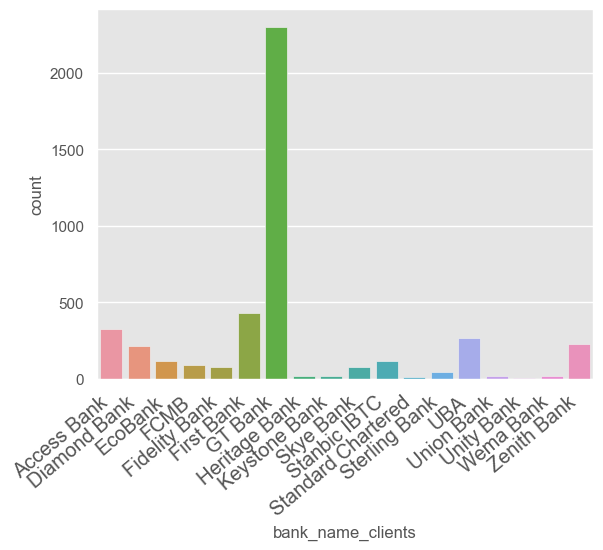

In [143]:
import plotly.express as px

bankname_count = sns.countplot(df['bank_name_clients'])
bankname_count.set_xticklabels(bankname_count.get_xticklabels(),rotation = 40, horizontalalignment = 'right', fontweight = 'light',
                          fontsize='x-large')


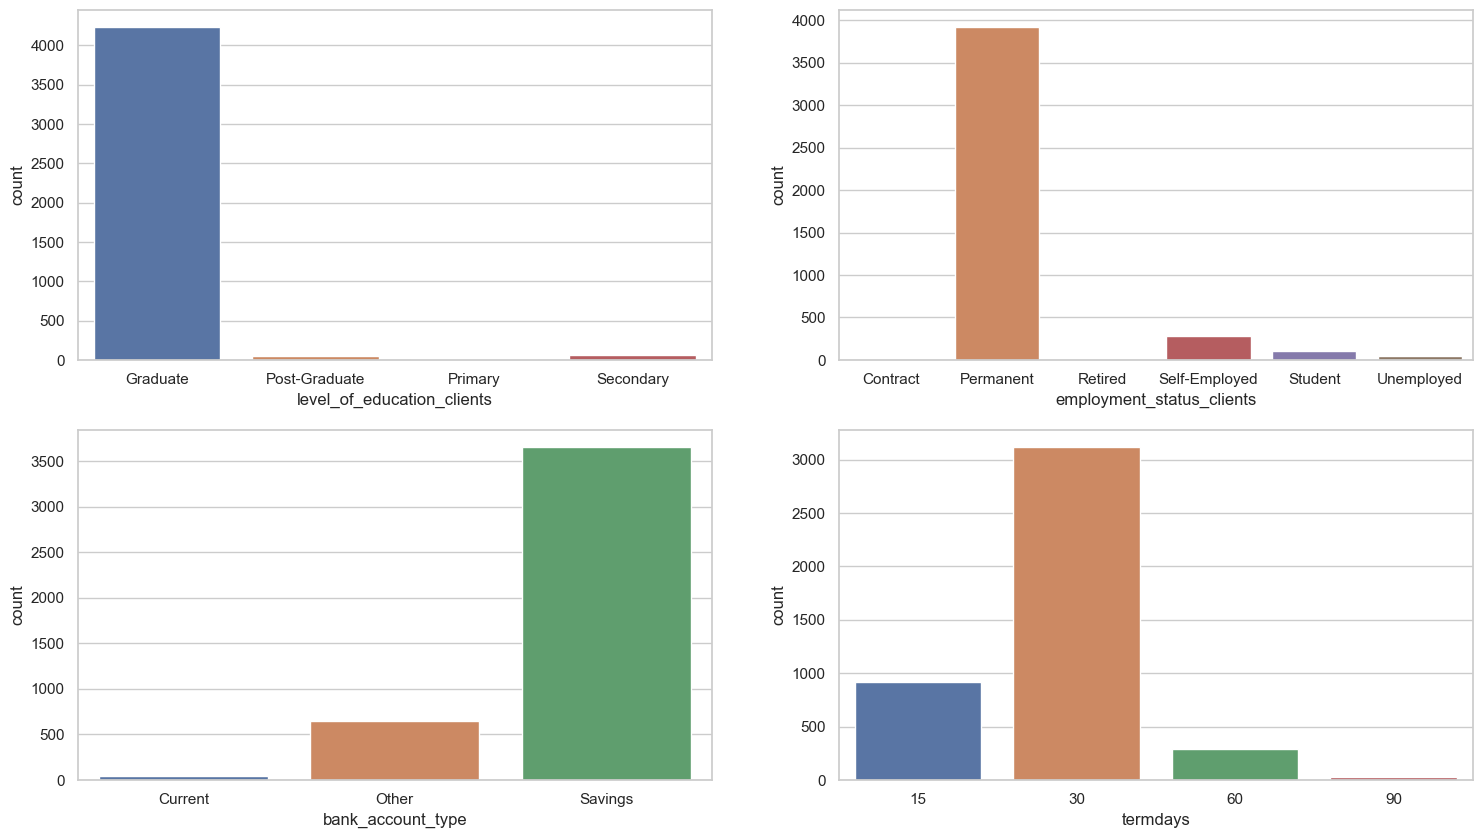

In [151]:
##categorical variables visualization
fig,axes=plt.subplots(2,2,figsize=(18,10))
sns.countplot(ax=axes[0,0],x="level_of_education_clients",data=df);
sns.countplot(ax=axes[0,1],x="employment_status_clients",data=df);
sns.countplot(ax=axes[1,0],x="bank_account_type",data=df);
sns.countplot(ax=axes[1,1],x="termdays",data=df);


<AxesSubplot:xlabel='age', ylabel='Density'>

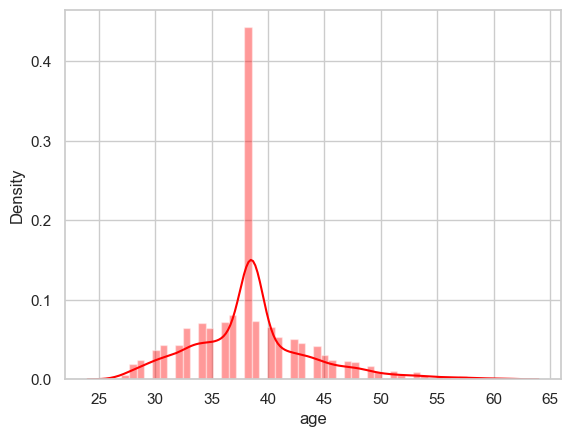

In [86]:
##PLot of Age
sns.distplot(df['age'], color='red')

<AxesSubplot:xlabel='loannumber', ylabel='Density'>

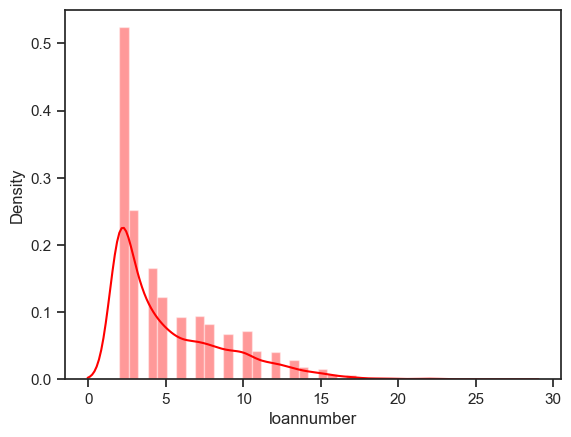

In [371]:
##PLot of loannumber
sns.distplot(df['loannumber'], color='red')

<AxesSubplot:xlabel='loanamount', ylabel='Density'>

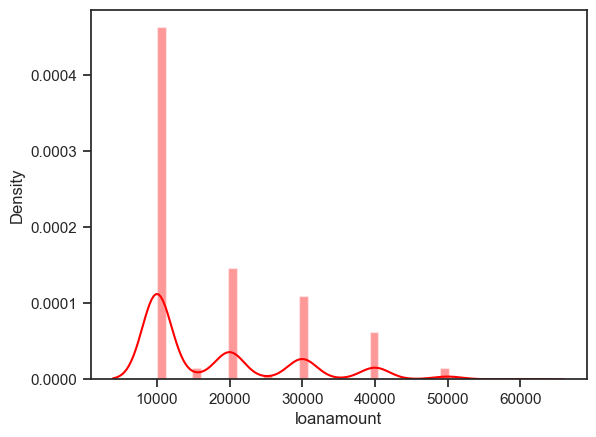

In [372]:
##PLot of loannumber
sns.distplot(df['loanamount'], color='red')

<AxesSubplot:xlabel='totaldue', ylabel='Density'>

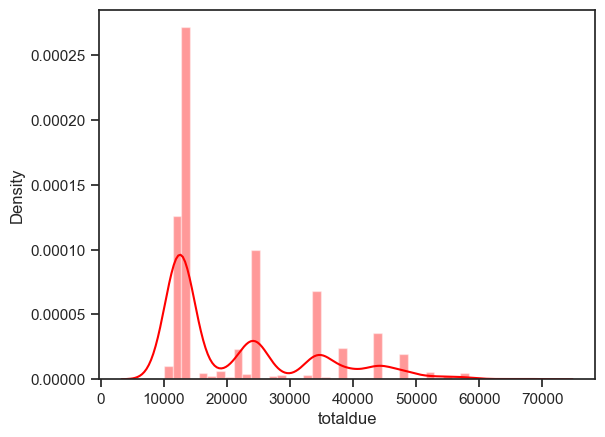

In [373]:
##PLot of totaldue
sns.distplot(df['totaldue'], color='red')
sns.distplot(df['loan_received'], color='red')


<AxesSubplot:xlabel='loan_received', ylabel='Density'>

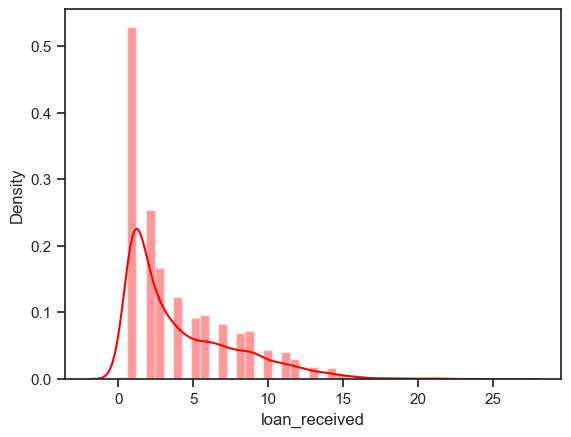

In [374]:
##PLot of loan_received
sns.distplot(df['loan_received'], color='red')

<AxesSubplot:xlabel='amount_received', ylabel='Density'>

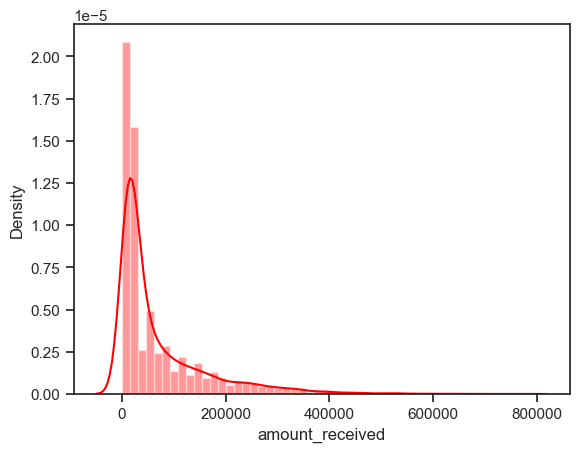

In [375]:
##PLot of amount_received
sns.distplot(df['amount_received'], color='red')

<AxesSubplot:xlabel='lowest_amount_received', ylabel='Density'>

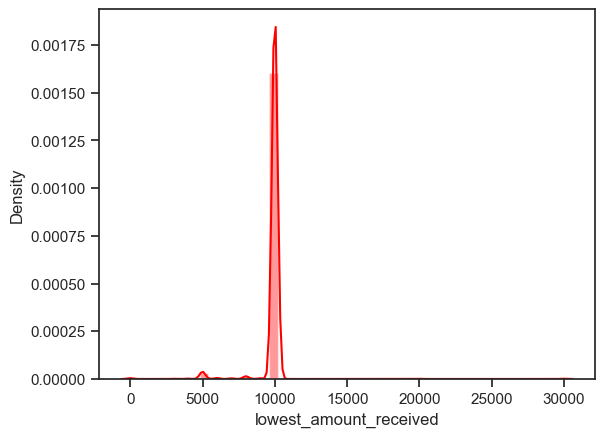

In [376]:
##PLot of lowest_amount_received
sns.distplot(df['lowest_amount_received'], color='red')

<AxesSubplot:xlabel='highest_amount_received', ylabel='Density'>

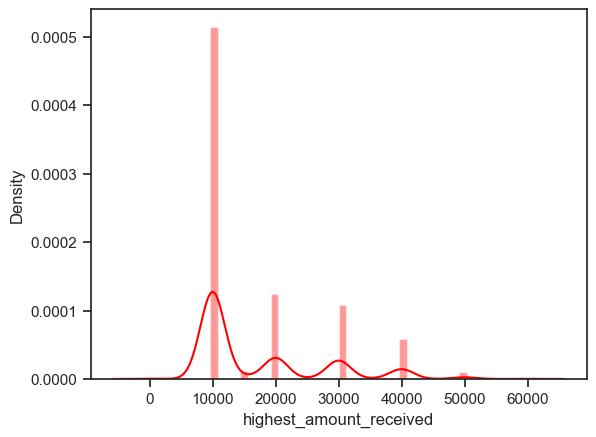

In [377]:
##PLot of lowest_amount_received
sns.distplot(df['highest_amount_received'], color='red')

#### Apply Log transformation on Numerical variables

In [208]:
#define variables to transform
variables_to_transform = ['termdays', 'loannumber', 'loanamount', 'totaldue', 'age']

# Apply log transformation to the specified variables
for variable in variables_to_transform:
    df[f'{variable}_log'] = np.log(df[variable])


#### Visualize the tranformed variables

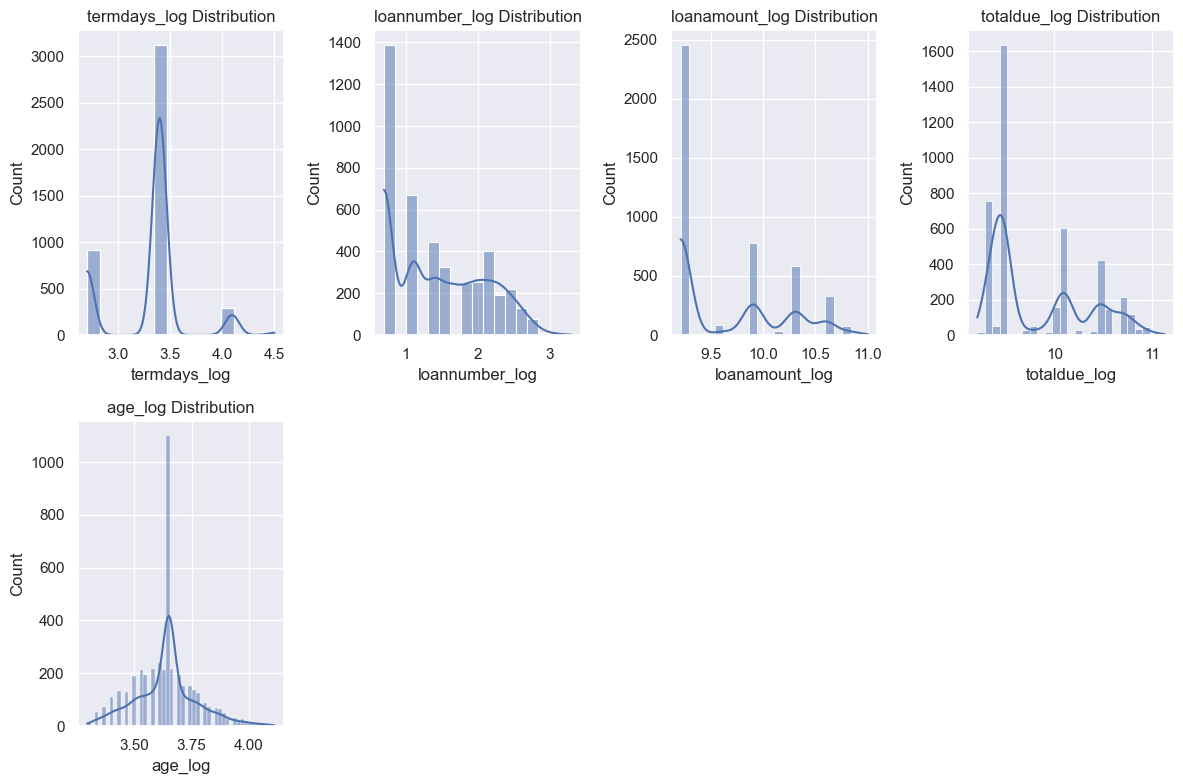

In [79]:
# List of log-transformed variables
log_transformed_variables = ['termdays_log', 'loannumber_log', 'loanamount_log', 'totaldue_log', 'age_log']

# Create subplots for the histograms of log-transformed variables
plt.figure(figsize=(12, 8))
for i, variable in enumerate(log_transformed_variables, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[variable], kde=True)
    plt.title(f'{variable} Distribution')
plt.tight_layout()
plt.show()




#### Visualize the good_bad_flag variable

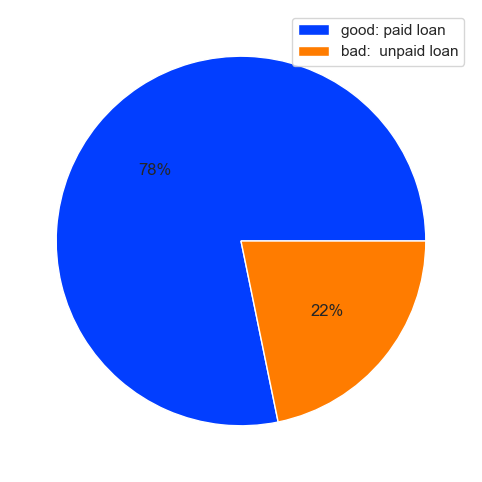

In [382]:
# visualising to see payment status of loan 
plt.figure(figsize=(12,6))
palette_color = sns.color_palette('bright')
plt.pie(df['good_bad_flag'].value_counts(),colors= palette_color, autopct='%.0f%%') 
plt.legend(["good: paid loan","bad:  unpaid loan"]) 

#### Good bad flag and employment status

<AxesSubplot:xlabel='good_bad_flag', ylabel='count'>

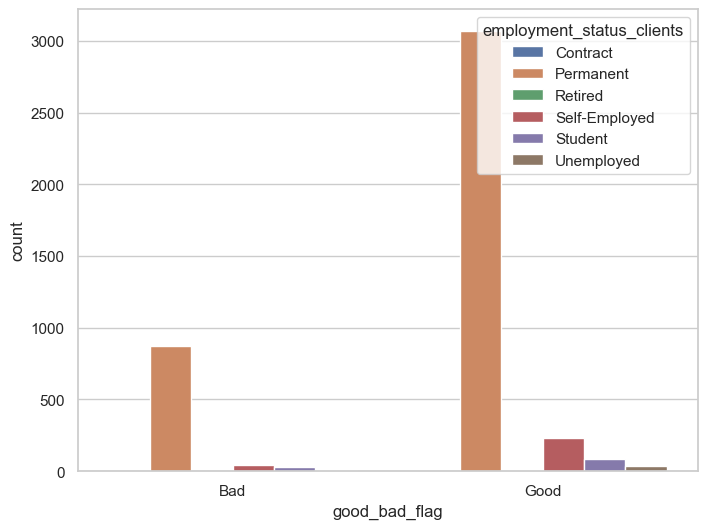

In [95]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.countplot(data = df, x= 'good_bad_flag', hue='employment_status_clients')


#### Good_bad_flag and Level of education

<AxesSubplot:xlabel='good_bad_flag', ylabel='count'>

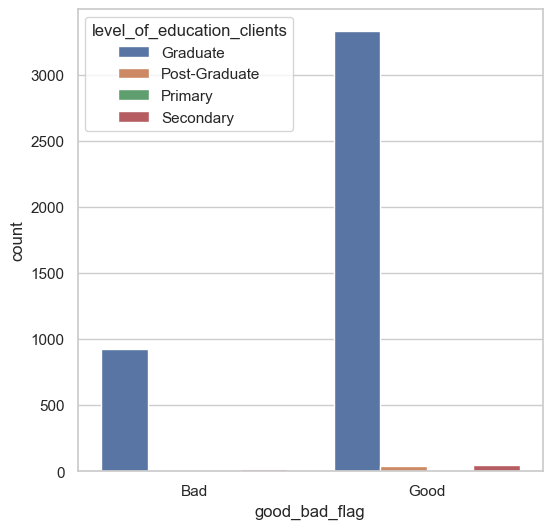

In [94]:
plt.figure(figsize=(6,6))
sns.set_style('whitegrid')
sns.countplot(data = df, x= 'good_bad_flag', hue='level_of_education_clients')


<AxesSubplot:xlabel='good_bad_flag', ylabel='count'>

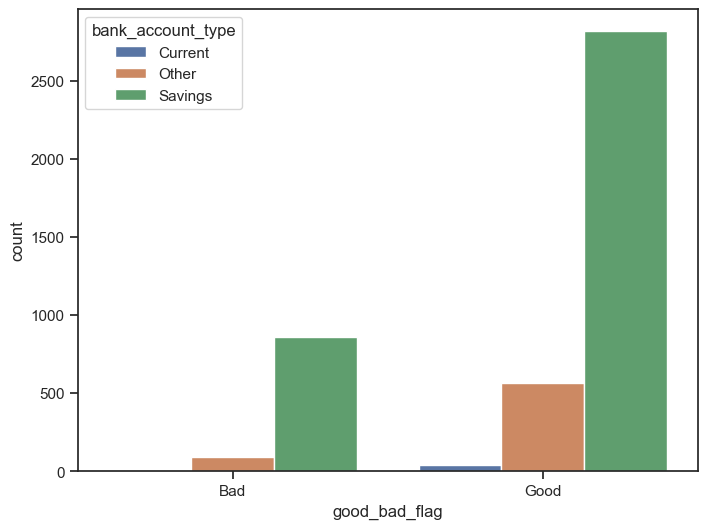

In [96]:
plt.figure(figsize=(8,6))
sns.set_style('ticks')
sns.countplot(data = df, x= 'good_bad_flag', hue='bank_account_type')


#### Good bad flag and age_log

<AxesSubplot:xlabel='good_bad_flag', ylabel='age_log'>

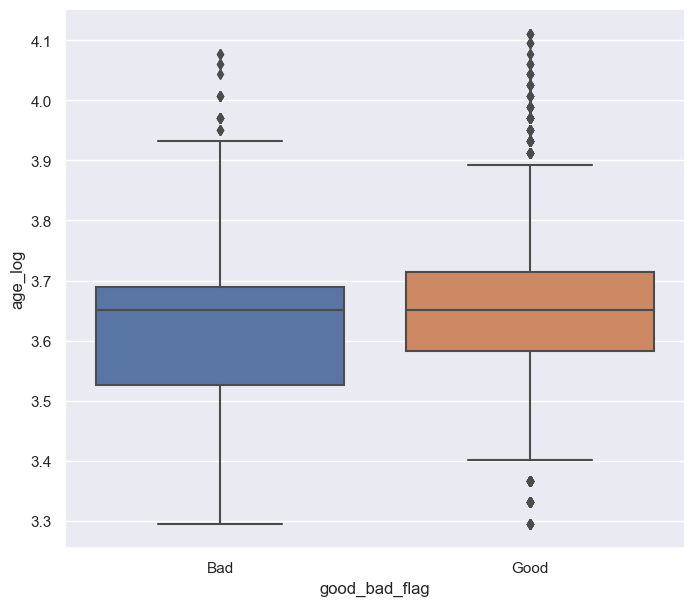

In [80]:
plt.figure(figsize=(8, 7))
sns.boxplot(x='good_bad_flag',y='age_log',data=df)

#### Good bad flag, employment status and age

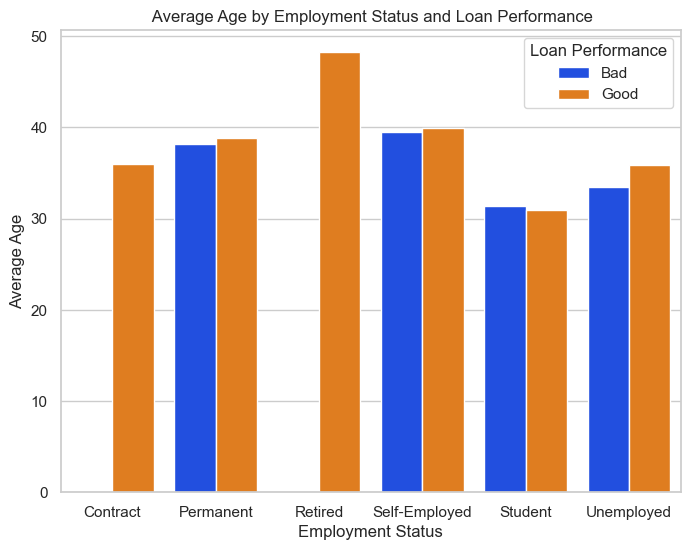

In [174]:
# Set the style of the plots
sns.set(style="whitegrid")

# Group the data and calculate the mean age for each category
grouped_data = df.groupby(["employment_status_clients", "good_bad_flag"])["age"].mean().reset_index()

# Create a grouped bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped_data, x="employment_status_clients", y="age", hue="good_bad_flag", palette="bright")
plt.title(" Average Age by Employment Status and Loan Performance")
plt.xlabel("Employment Status")
plt.ylabel("Average Age")
plt.legend(title="Loan Performance")
plt.show()


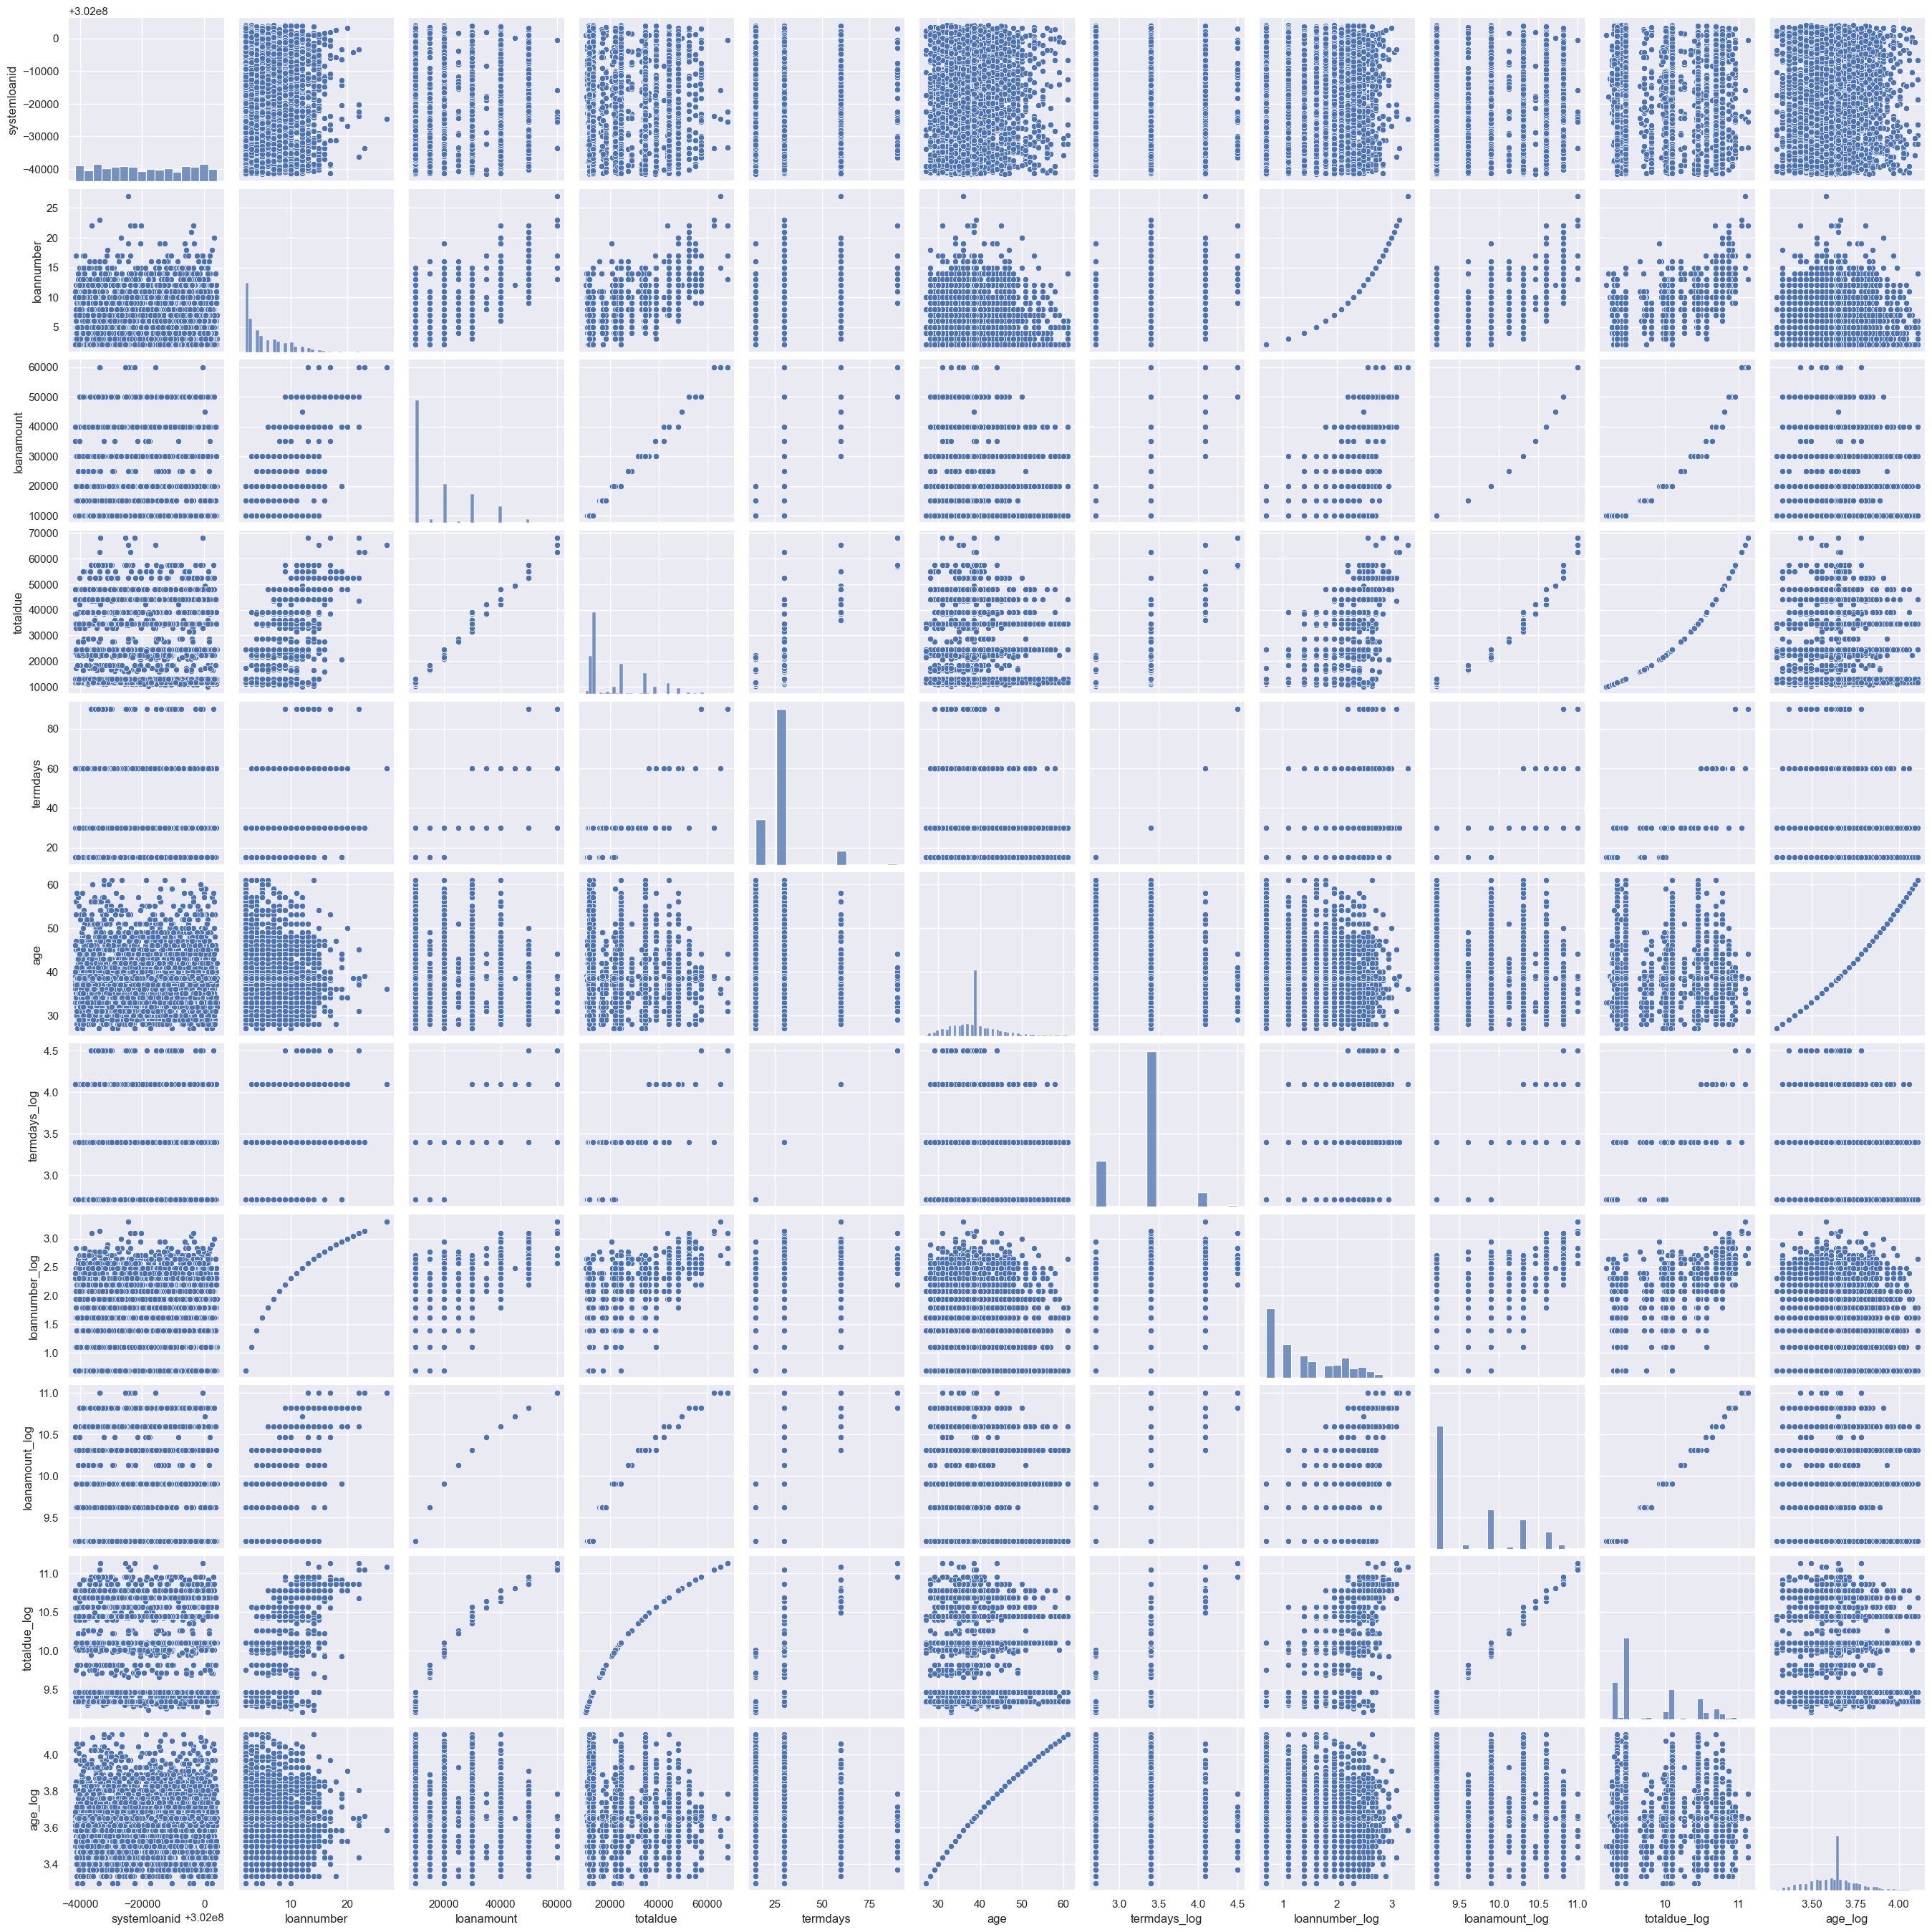

In [529]:
##investigating relationship between the variables
sns.pairplot(df)


<AxesSubplot:>

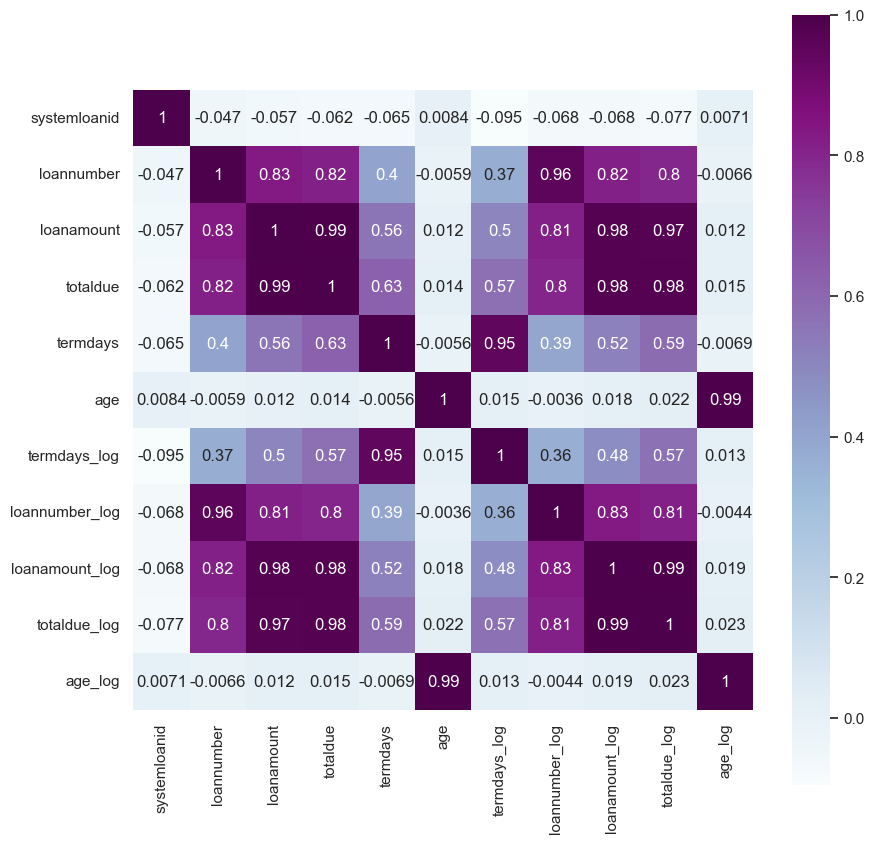

In [81]:
# check correlation for the numerical variables

correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, square = True, annot = True, cmap = 'BuPu')

#### Drop Unneccessary columns

In [209]:
Columns_to_drop = ['termdays','customerid','approveddate', 'creationdate', 'systemloanid','loannumber', 'loanamount', 'totaldue', 'age']
df = df.drop(columns = Columns_to_drop, axis = 1)

## ENCODING


In [210]:
# Encoding by changing categorical value to binary
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['bank_account_type', 'bank_name_clients', 'bank_branch_clients', 'employment_status_clients', 
         'level_of_education_clients', 'good_bad_flag']
encoder = LabelEncoder()
for col in columns_to_encode:
    df[col] = encoder.fit_transform(df[col])
df

,good_bad_flag,bank_account_type,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,termdays_log,loannumber_log,loanamount_log,totaldue_log,age_log
435,0,2,6,24,1,2,2.708050,0.693147,9.210340,9.350102,3.496508
2695,1,1,11,22,1,0,4.094345,1.609438,10.308953,10.571317,3.761200
3305,1,2,6,17,1,0,3.401197,2.079442,9.903488,10.106428,3.784190
3150,1,2,5,1,1,3,4.094345,2.197225,10.308953,10.571317,3.784190
126,1,2,6,22,1,0,2.708050,1.098612,9.210340,9.350102,3.651991
...,...,...,...,...,...,...,...,...,...,...,...
1793,1,2,14,22,1,0,4.094345,1.945910,10.308953,10.571317,3.737670
4163,1,2,5,22,1,0,3.401197,1.945910,10.308953,10.448715,3.555348
3833,1,2,6,22,1,0,3.401197,0.693147,9.903488,10.106428,3.651991
3620,1,2,6,22,1,0,3.401197,1.945910,10.308953,10.448715,3.496508


## CREATING INPUT FEATURES AND OUTPUT TARGET VARIABLES

In [211]:
X = df.drop(['good_bad_flag'], axis = 1)
y = df['good_bad_flag']


#### Apply Smote for balancing

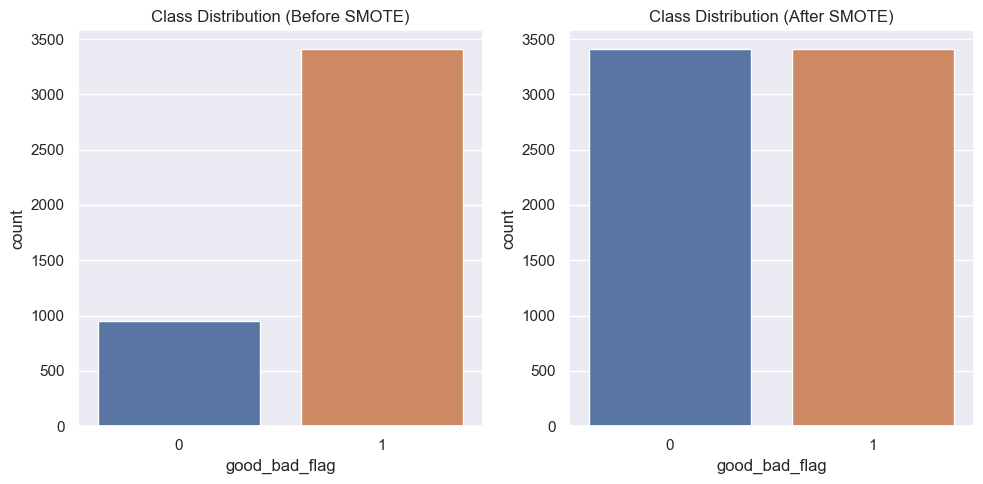

In [213]:
# Initialize SMOTE
smote = SMOTE(random_state=0)

# Apply SMOTE to create synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Visualization before and after SMOTE
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y)
plt.title("Class Distribution (Before SMOTE)")

plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title("Class Distribution (After SMOTE)")

plt.tight_layout()
plt.show()


## PREPROCESSING AND SPLITTING DATA

In [214]:
# Standardizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.30, random_state=0)

# After Scaling: Convert scaled data back to NumPy arrays
X_train_scaled = np.array(X_train)
X_test_scaled = np.array(X_test)


Missing values before scaling:
0


#### Define Metrics score and Calculate confusion matrix

In [216]:
def metrics_score(actual, predicted):
    # Print classification report
    print(classification_report(actual, predicted))
    
    # Calculate confusion matrix
    cm = confusion_matrix(actual, predicted)
    
    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(4,2))
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


## Build Decision Tree Model

In [220]:

DT = DecisionTreeClassifier(random_state=7)
# Fitting Decision tree model
DT.fit(X_train_scaled,y_train)

DecisionTreeClassifier(random_state=7)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2377
           1       0.92      0.84      0.88      2395

    accuracy                           0.89      4772
   macro avg       0.89      0.89      0.89      4772
weighted avg       0.89      0.89      0.89      4772



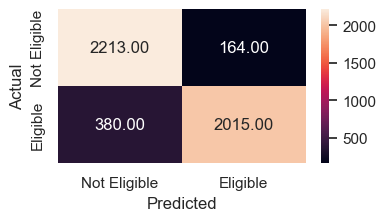

In [221]:
# Checking performance on the training data
DT_predictions=DT.predict(X_train_scaled)
metrics_score(y_train,DT_predictions)

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1032
           1       0.72      0.68      0.70      1014

    accuracy                           0.71      2046
   macro avg       0.71      0.71      0.71      2046
weighted avg       0.71      0.71      0.71      2046



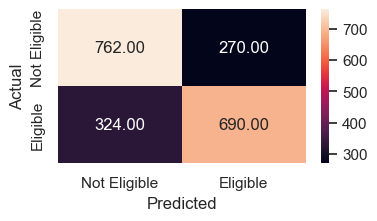

In [222]:
# Checking performance on the testing data
DT_predictions=DT.predict(X_test_scaled)
metrics_score(y_test,DT_predictions)

#### Hyperparameter Tunning

In [223]:
"""
DT_tuned = DecisionTreeClassifier(random_state = 10)
distributions={"criterion":['gini','entropy'],
              "min_samples_split":range(1,80),
              "min_samples_leaf": range(5,200),
              "max_features":['auto', 'sqrt', 'log2', None],
              "max_depth":range(5,100)
              

scorer = metrics.make_scorer(recall_score, pos_label = 1)

clf = RandomizedSearchCV(DT_tuned, distributions, random_state=1,scoring=scorer,cv=5,n_iter=30)
search = clf.fit(X_train_scaled,y_train)
search.best_params_
"""

'\nDT_tuned = DecisionTreeClassifier(random_state = 10)\ndistributions={"criterion":[\'gini\',\'entropy\'],\n              "min_samples_split":range(1,80),\n              "min_samples_leaf": range(5,200),\n              "max_features":[\'auto\', \'sqrt\', \'log2\', None],\n              "max_depth":range(5,100)\n              \n\nscorer = metrics.make_scorer(recall_score, pos_label = 1)\n\nclf = RandomizedSearchCV(DT_tuned, distributions, random_state=1,scoring=scorer,cv=5,n_iter=30)\nsearch = clf.fit(X_train_scaled,y_train)\nsearch.best_params_\n'

In [224]:
# Choose the type of classifier. This grid was defined after severl steps of searches on different intervals 
DT_tuned = DecisionTreeClassifier(criterion="entropy",random_state=10)


# Grid of parameters to choose from
parameters = {'min_samples_split':range(1,5),
              'min_samples_leaf': np.arange(36,40),
              'max_depth': np.arange(10,15)               
             }


# Check scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)
# Run the grid search
clf_grid = GridSearchCV(DT_tuned, parameters, scoring = scorer)
# Fit the GridSearch on train dataset
search_grid = clf_grid.fit(X_train_scaled, y_train)
# Set the clf to the best combination of parameters
DT_tuned = search_grid.best_estimator_
# Fit the best algorithm to the data. 
DT_tuned.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_leaf=36,
                       random_state=10)

              precision    recall  f1-score   support

           0       0.69      0.69      0.69      2377
           1       0.69      0.69      0.69      2395

    accuracy                           0.69      4772
   macro avg       0.69      0.69      0.69      4772
weighted avg       0.69      0.69      0.69      4772



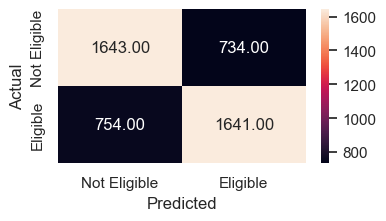

In [225]:
# Check performance on the training data based on the tuned model
DT_predictions = DT_tuned.predict(X_train_scaled)

metrics_score(y_train,DT_predictions)

              precision    recall  f1-score   support

           0       0.65      0.64      0.64      1032
           1       0.64      0.65      0.64      1014

    accuracy                           0.64      2046
   macro avg       0.64      0.64      0.64      2046
weighted avg       0.64      0.64      0.64      2046



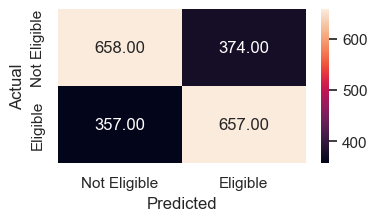

In [226]:
# Checking performance on the testing data based on the tuned model
DT_predictions = DT_tuned.predict(X_test_scaled)

metrics_score(y_test,DT_predictions)


### FEATURE IMPORTANCE OF DECISION TREE

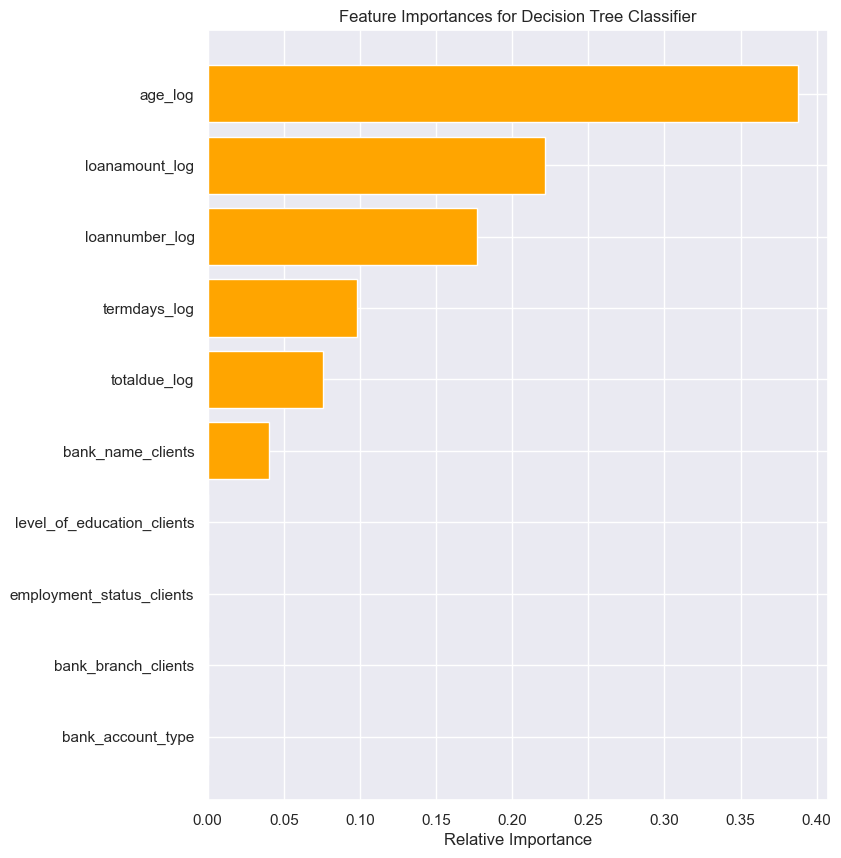

In [227]:
def plot_feature_importances_horizontal(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)
    
    plt.figure(figsize=(8, 10))
    plt.title('Feature Importances for Decision Tree Classifier')
    plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    
    plt.show()

# Get the column/feature names from the dataset
feature_names = list(X.columns)

# Call the function with your trained model and feature names
plot_feature_importances_horizontal(DT_tuned, feature_names)


#### ROC curve and ROC-AUC score

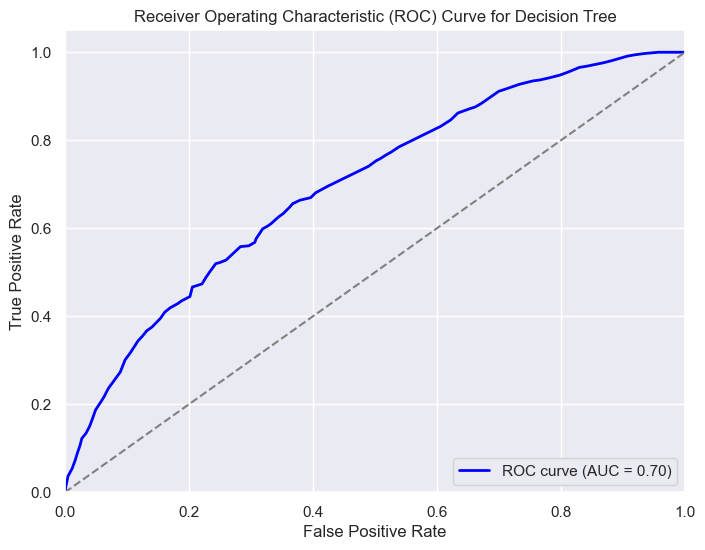

In [229]:
# Get predicted probabilities for the positive class
y_scores_dt = DT_tuned.predict_proba(X_test_scaled)[:, 1]  

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_dt)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_scores_dt)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()


## RANDOM FOREST CLASSIFIER

In [230]:
# Defining Random forest classifier
RF = RandomForestClassifier(random_state=7)

# Fitting Random forest model
RF.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=7)

## performance on the train dataset


              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2377
           1       0.91      0.86      0.88      2395

    accuracy                           0.89      4772
   macro avg       0.89      0.89      0.89      4772
weighted avg       0.89      0.89      0.89      4772



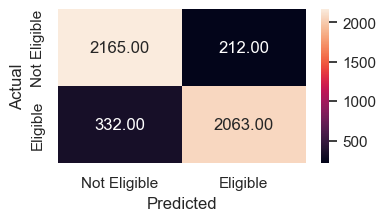

In [231]:
#Checking performance on the training data
RF_prediction =  RF.predict(X_train_scaled)

metrics_score(y_train,RF_prediction)

## Confirming the performance on the test dataset


              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1032
           1       0.72      0.74      0.73      1014

    accuracy                           0.73      2046
   macro avg       0.73      0.73      0.73      2046
weighted avg       0.73      0.73      0.73      2046



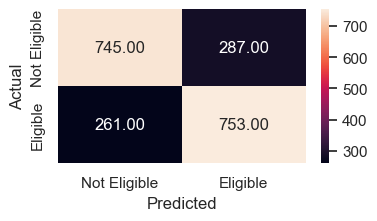

In [232]:
# Checking performance on the test data
RF_prediction = RF.predict(X_test_scaled)

metrics_score(y_test,RF_prediction)

## Tuning the Random Forest using RandomizedSearchCV 

In [233]:
"""
RF_Tuned = RandomForestClassifier(random_state=8)
distributions = {
    "n_estimators": range(10, 600),
    "criterion": ['gini', 'entropy'],
    "min_samples_split": range(1, 50),
    "min_samples_leaf": range(5, 100),
    "max_features": ['auto', 'sqrt', 'log2', None],
    "max_depth": range(5, 100)
}

scorer = metrics.make_scorer(recall_score, pos_label=1)

clf = RandomizedSearchCV(RF_Tuned, distributions, random_state=1, scoring=scorer, n_iter=30)
search = clf.fit(X_train_scaled, y_train)
search.best_params_

"""

'\nRF_Tuned = RandomForestClassifier(random_state=8)\ndistributions = {\n    "n_estimators": range(10, 600),\n    "criterion": [\'gini\', \'entropy\'],\n    "min_samples_split": range(1, 50),\n    "min_samples_leaf": range(5, 100),\n    "max_features": [\'auto\', \'sqrt\', \'log2\', None],\n    "max_depth": range(5, 100)\n}\n\nscorer = metrics.make_scorer(recall_score, pos_label=1)\n\nclf = RandomizedSearchCV(RF_Tuned, distributions, random_state=1, scoring=scorer, n_iter=30)\nsearch = clf.fit(X_train_scaled, y_train)\nsearch.best_params_\n\n'

## Performing GridSearchCV for Hyperparameter tuning on the model

In [234]:

# Choose the type of classifier
RF_Tuned = RandomForestClassifier(criterion="entropy", random_state=10, min_samples_split=2, n_jobs=-1)

# Grid of parameters to choose from
parameters = {
    'n_estimators': [410, 412, 414],
    "min_samples_leaf": [8, 10, 12],
    "max_depth": [15, 16, 17]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(RF_Tuned, parameters, scoring=scorer)
grid_obj.fit(X_train_scaled, y_train)  # Using scaled dataset

# Set the clf to the best combination of parameters
RF_Tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
RF_Tuned.fit(X_train_scaled, y_train)  # Using scaled dataset


RandomForestClassifier(criterion='entropy', max_depth=17, min_samples_leaf=8,
                       n_estimators=414, n_jobs=-1, random_state=10)



## Checking the performance on the train dataset


              precision    recall  f1-score   support

           0       0.73      0.79      0.76      2377
           1       0.78      0.71      0.74      2395

    accuracy                           0.75      4772
   macro avg       0.76      0.75      0.75      4772
weighted avg       0.76      0.75      0.75      4772



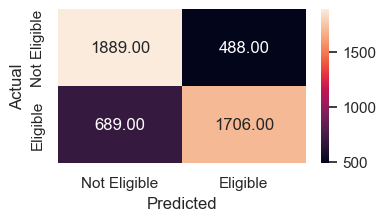

In [235]:
# Checking performance on the training data
Randomforest_pred = RF_Tuned.predict(X_train_scaled)

metrics_score(y_train, Randomforest_pred)

## Performance on the test dataset


              precision    recall  f1-score   support

           0       0.69      0.70      0.69      1032
           1       0.69      0.68      0.69      1014

    accuracy                           0.69      2046
   macro avg       0.69      0.69      0.69      2046
weighted avg       0.69      0.69      0.69      2046



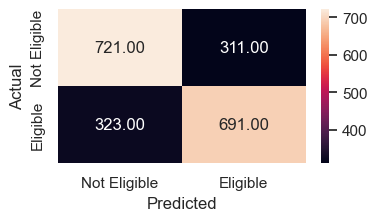

In [236]:
# Checking performace on test dataset
Randomforest_pred = RF_Tuned.predict(X_test_scaled)

metrics_score(y_test,Randomforest_pred)

## FEATURE IMPORTANCE FOR RANDOM FOREST

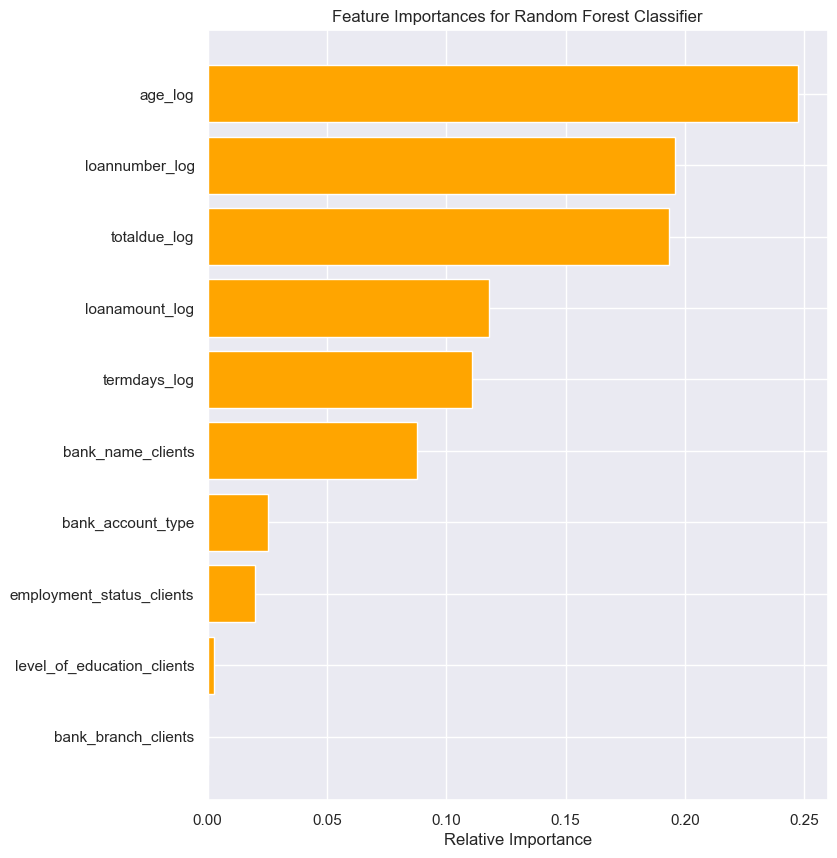

In [237]:
def plot_feature_importances_horizontal(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)
    
    plt.figure(figsize=(8, 10))
    plt.title('Feature Importances for Random Forest Classifier')
    plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    
    plt.show()

# Get the column/feature names from the dataset
feature_names = list(X.columns)

# Call the function with your trained model and feature names
plot_feature_importances_horizontal(RF_Tuned, feature_names)


#### ROC curve and ROC-AUC score

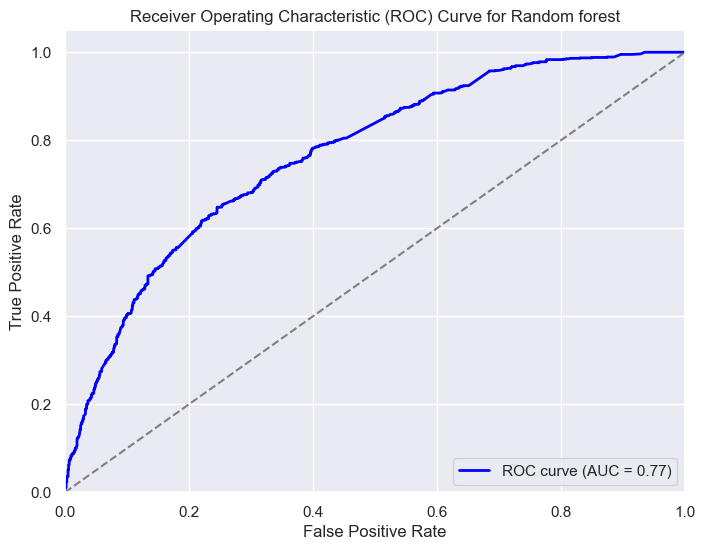

In [238]:
# Get predicted probabilities for the positive class
y_scores_rf = RF_Tuned.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_rf)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_scores_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random forest')
plt.legend(loc='lower right')
plt.show()


## SUPPORT VECTOR MODEL

In [239]:
# Choose the type of classifier. This grid was defined after severl steps of searches on different intervals 
SVM_tuned = SVC(random_state=7)

# Grid of parameters to choose from
parameters ={"kernel":['rbf'],
             "gamma":[.4,.5,.6],
             "C":[.015,.02,.025]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)
# Run the grid search
grid_obj = GridSearchCV(SVM_tuned, parameters, scoring = scorer)
#fit the GridSearch on train dataset
grid_obj = grid_obj.fit(X_train_scaled, y_train)
# Set the clf to the best combination of parameters
SVM_tuned = grid_obj.best_estimator_
# Fit the best algorithm to the data. 
SVM_tuned .fit(X_train_scaled, y_train)

SVC(C=0.015, gamma=0.6, random_state=7)

## Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.62      0.41      0.49      2377
           1       0.56      0.76      0.64      2395

    accuracy                           0.58      4772
   macro avg       0.59      0.58      0.57      4772
weighted avg       0.59      0.58      0.57      4772



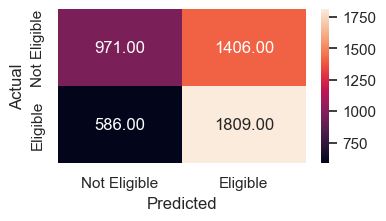

In [240]:
# Checking performance on the training data
SVM_Predictions = SVM_tuned.predict(X_train_scaled)

metrics_score(y_train, SVM_Predictions)

## Checking the performance on the test dataset


              precision    recall  f1-score   support

           0       0.61      0.38      0.47      1032
           1       0.54      0.75      0.63      1014

    accuracy                           0.56      2046
   macro avg       0.57      0.56      0.55      2046
weighted avg       0.57      0.56      0.55      2046



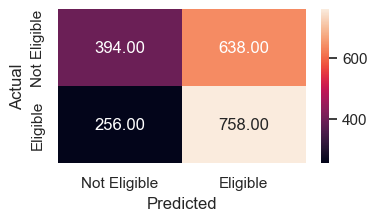

In [241]:
# Checking performance on the test data
SVM_Predictions = SVM_tuned.predict(X_test_scaled)

metrics_score(y_test, SVM_Predictions)

#### ROC and ROC-AUC score

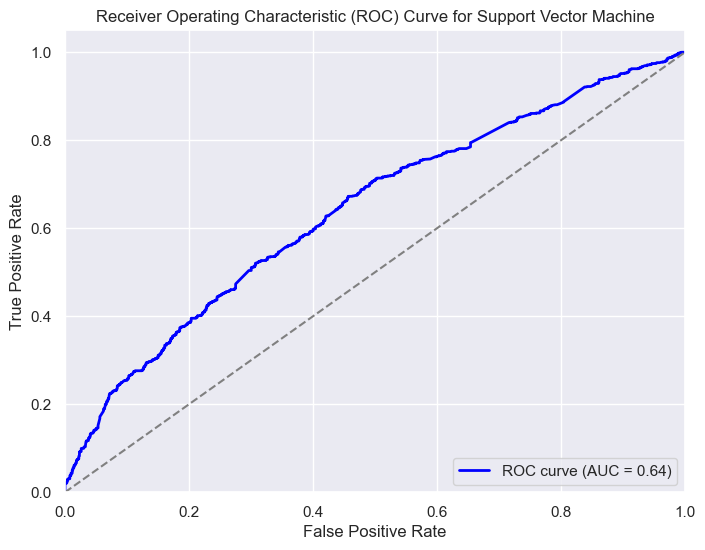

In [252]:
# Set probability parameter to True
SVM_tuned = SVC(probability=True)
SVM_tuned.fit(X_train_scaled, y_train)

# Get predicted probabilities for the positive class
y_scores_svm = SVM_tuned.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_svm)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_scores_svm)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Support Vector Machine')
plt.legend(loc='lower right')
plt.show()


## K Nearest Neighbours Model


## First by using RandomizedSearchCV for Hyperparameter tuning on the model 

In [242]:
#Choose the type of classifier. This grid was defined after severl steps of searches on different intervals 
KNN_tuned = KNeighborsClassifier()
# Grid of parameters to choose from
parameters ={"n_neighbors":np.arange(1,15),
             "weights":['uniform','distance'],
             "p":[1,2]
            }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)
# Run the grid search
grid_obj = GridSearchCV(KNN_tuned, parameters, scoring = scorer)
#fit the GridSearch on train dataset
grid_obj = grid_obj.fit(X_train_scaled, y_train)
# Set the clf to the best combination of parameters
KNN_tuned = grid_obj.best_estimator_
# Fit the best algorithm to the data. 
KNN_tuned .fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

## Checking the performance on the train dataset


              precision    recall  f1-score   support

           0       0.88      0.83      0.86      2377
           1       0.84      0.89      0.86      2395

    accuracy                           0.86      4772
   macro avg       0.86      0.86      0.86      4772
weighted avg       0.86      0.86      0.86      4772



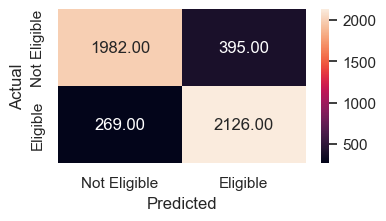

In [243]:
KNN_prediction = KNN_tuned.predict(X_train_scaled)

metrics_score(y_train, KNN_prediction)

## Checking the performance on the test dataset


              precision    recall  f1-score   support

           0       0.68      0.63      0.66      1032
           1       0.65      0.70      0.68      1014

    accuracy                           0.67      2046
   macro avg       0.67      0.67      0.67      2046
weighted avg       0.67      0.67      0.67      2046



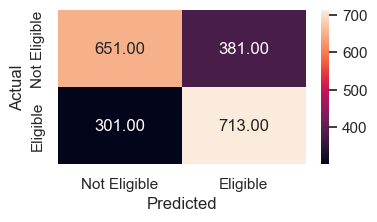

In [244]:
# Checking performance on the test data
KNN_prediction = KNN_tuned.predict(X_test_scaled)

metrics_score(y_test, KNN_prediction)

#### ROC AND ROC-AUC score

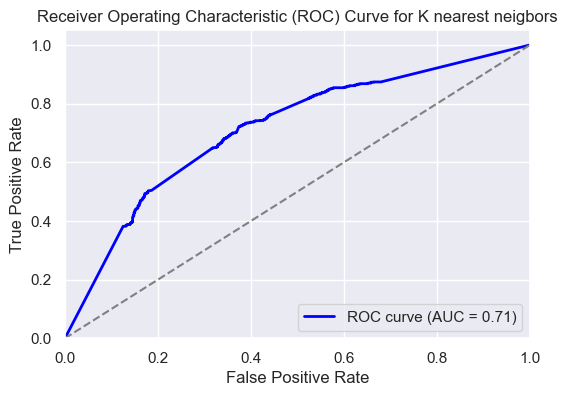

In [245]:
# Get predicted probabilities for the positive class
y_scores_knn = KNN_tuned.predict_proba(X_test_scaled)[:, 1]  

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_knn)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_scores_knn)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for K nearest neigbors')
plt.legend(loc='lower right')
plt.show()


## GradientBoosting Model

### First by using RandomizedSearchCV for Hyperparameter tuning on the model 

In [265]:
#Setting the distribution dictionary
"""
distributions = {
    "n_estimators": range(100, 1500),
    "criterion": ['gini', 'entropy'],
    "min_samples_split": range(2, 30), 
    "min_samples_leaf": range(1, 100),  
    "max_features": ['auto', 'sqrt', 'log2', None],
    "max_depth": range(5, 100)
}

scorer = metrics.make_scorer(recall_score, pos_label = 1)

clf = RandomizedSearchCV(GB_tuned, distributions, random_state=1,scoring=scorer,n_iter=30)
search = clf.fit(X_train_scaled,y_train)
search.best_params_
"""

'\ndistributions = {\n    "n_estimators": range(100, 1500),\n    "criterion": [\'gini\', \'entropy\'],\n    "min_samples_split": range(2, 30), \n    "min_samples_leaf": range(1, 100),  \n    "max_features": [\'auto\', \'sqrt\', \'log2\', None],\n    "max_depth": range(5, 100)\n}\n\nscorer = metrics.make_scorer(recall_score, pos_label = 1)\n\nclf = RandomizedSearchCV(GB_tuned, distributions, random_state=1,scoring=scorer,n_iter=30)\nsearch = clf.fit(X_train_scaled,y_train)\nsearch.best_params_\n'

In [247]:
#Choose the type of classifier 
GB_tuned = GradientBoostingClassifier(random_state=7, min_samples_split= 2, 
    min_samples_leaf= 80,  
    max_features = 'sqrt',
    max_depth= 20)

# Grid of parameters to choose from
parameters ={"n_estimators":[1000,1200,1500],
             "learning_rate":[.02,.025,0.275]
            } 

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)
# Run the grid search
grid_obj = GridSearchCV(GB_tuned, parameters, scoring = scorer)
#fit the GridSearch on train dataset
grid_obj = grid_obj.fit(X_train_scaled, y_train)
# Set the clf to the best combination of parameters
GB_tuned = grid_obj.best_estimator_
# Fit the best algorithm to the data. 
GB_tuned .fit(X_train_scaled, y_train)

GradientBoostingClassifier(learning_rate=0.275, max_depth=20,
                           max_features='sqrt', min_samples_leaf=80,
                           n_estimators=1000, random_state=7)

## Performance on Training set

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2377
           1       0.89      0.86      0.87      2395

    accuracy                           0.88      4772
   macro avg       0.88      0.88      0.88      4772
weighted avg       0.88      0.88      0.88      4772



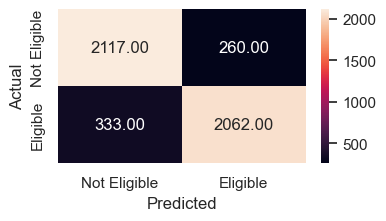

In [248]:
# Checking performance on the training data
GB_prediction = GB_tuned.predict(X_train)

metrics_score(y_train, GB_prediction)

## ON TEST SET

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1032
           1       0.76      0.77      0.77      1014

    accuracy                           0.77      2046
   macro avg       0.77      0.77      0.77      2046
weighted avg       0.77      0.77      0.77      2046



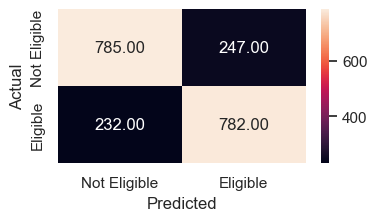

In [249]:
GB_prediction = GB_tuned.predict(X_test)

metrics_score(y_test, GB_prediction)

#### FEATURE IMPPORTANCE

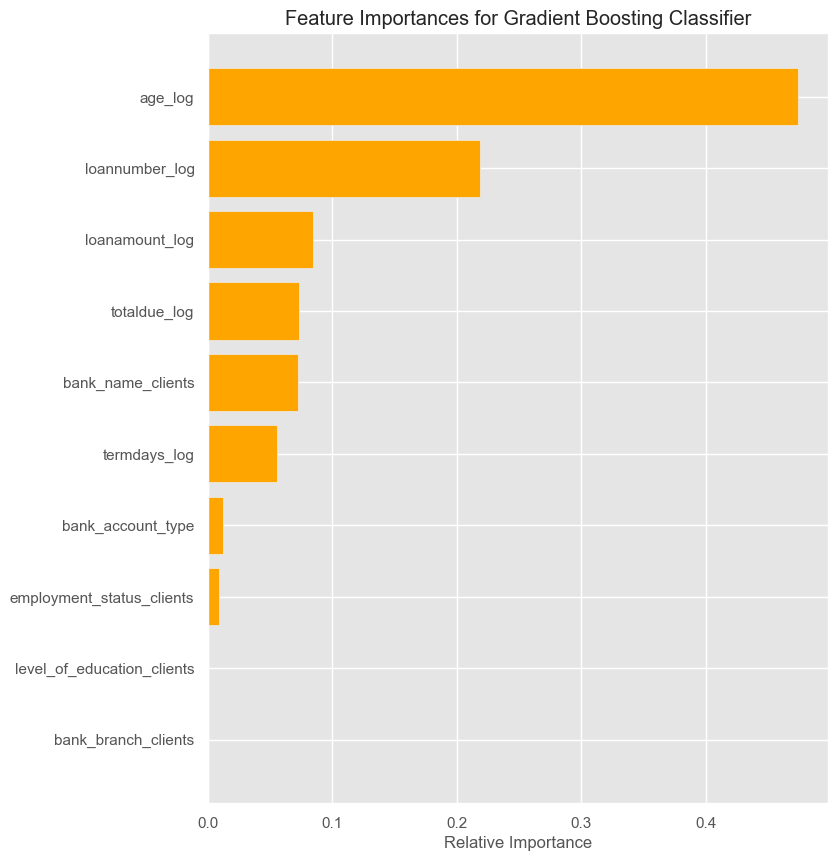

In [264]:
def plot_feature_importances_horizontal(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)
    
    plt.figure(figsize=(8, 10))
    plt.title('Feature Importances for Gradient Boosting Classifier')
    plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    
    plt.show()

# Get the column/feature names from the dataset
feature_names = list(X.columns)

# Call the function with your trained model and feature names
plot_feature_importances_horizontal(GB_tuned, feature_names)


#### ROC and ROC-AUC score

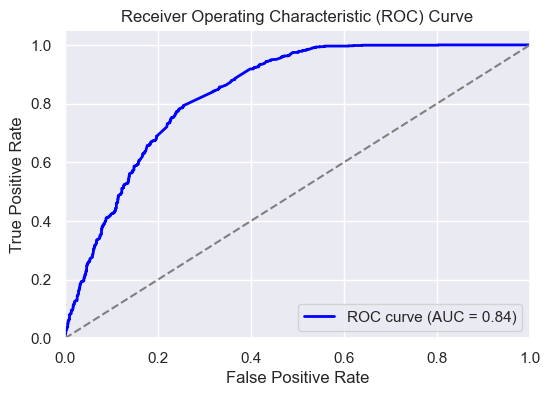

In [250]:
# Get predicted probabilities for the positive class
y_scores_gb = GB_tuned.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_gb)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_scores_gb)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Model Comparison

In [253]:
models = [DT_tuned, RF_Tuned, GB_tuned, KNN_tuned, SVM_tuned]  
model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'K-Nearest Neighbors', 'Support Vector Count']

results = []

for i, model in enumerate(models):
    y_pred_train_i = model.predict(X_train_scaled)
    y_pred_test_i = model.predict(X_test_scaled)

    accuracy_train = accuracy_score(y_train, y_pred_train_i)
    accuracy_test = accuracy_score(y_test, y_pred_test_i)
    recall_train = recall_score(y_train, y_pred_train_i)
    recall_test = recall_score(y_test, y_pred_test_i)
    precision_train = precision_score(y_train, y_pred_train_i)
    precision_test = precision_score(y_test, y_pred_test_i)
    f1_train = f1_score(y_train, y_pred_train_i)
    f1_test = f1_score(y_test, y_pred_test_i)

    results.append({
        'Model': model_names[i],
        'Accuracy (Train)': accuracy_train,
        'Accuracy (Test)': accuracy_test,
        'Precision (Train)': precision_train,
        'Precision (Test)': precision_test,
        'Recall (Train)': recall_train,
        'Recall (Test)': recall_test,
        'F1-score (Train)': f1_train,
        'F1-score (Test)': f1_test
    })

# Convert results to a DataFrame for easy tabular display
results_df = pd.DataFrame(results)

# Display the results in a tabular form
results_df



,Model,Accuracy (Train),Accuracy (Test),Precision (Train),Precision (Test),Recall (Train),Recall (Test),F1-score (Train),F1-score (Test)
0,Decision Tree,0.688181,0.642717,0.690947,0.637245,0.685177,0.647929,0.688050,0.642543
1,Random Forest,0.753353,0.690127,0.777575,0.689621,0.712317,0.681460,0.743517,0.685516
2,Gradient Boosting,0.875733,0.765885,0.888028,0.759961,0.860960,0.771203,0.874285,0.765541
3,K-Nearest Neighbors,0.860855,0.666667,0.843316,0.651737,0.887683,0.703156,0.864931,0.676471
4,Support Vector Count,0.634744,0.603128,0.666837,0.616628,0.544050,0.526627,0.599218,0.568085


#### Visualize Model Comparison

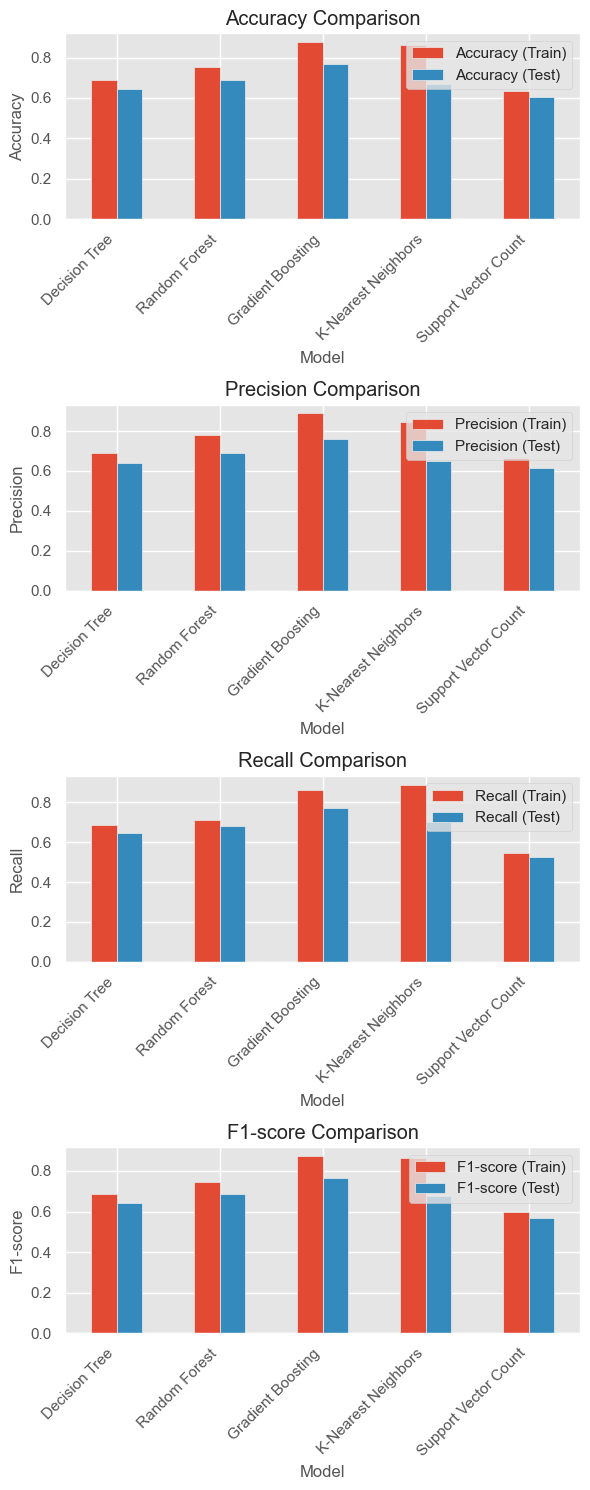

In [259]:
# Set the style of the plots
plt.style.use('ggplot')

# Plotting
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(6, 15))

# Metrics to visualize
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

for i, metric in enumerate(metrics):
    ax = axes[i]
    results_df.plot(kind='bar', x='Model', y=[f'{metric} (Train)', f'{metric} (Test)'],
                    ax=ax, legend=True)

    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel(metric)
    ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')

plt.tight_layout()
plt.show()


## Compile all AUC-ROC and Visualize

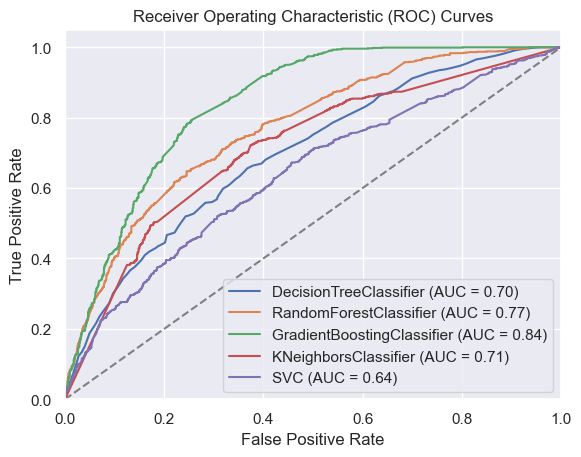

In [256]:
# List of your pre-trained and tuned models
models = [DT_tuned, RF_Tuned, GB_tuned, KNN_tuned, SVM_tuned]

# Initialize lists to store AUC scores and labels
auc_scores = []
model_labels = []

# Loop through models and calculate AUC-ROC
for model in models:
    if isinstance(model, SVC):
        y_scores = model.decision_function(X_test_scaled)  # Decision scores
    else:
        y_scores = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities of the positive class
        
    auc = roc_auc_score(y_test, y_scores)
    auc_scores.append(auc)
    model_name = type(model).__name__  # Get the class name of the model
    model_labels.append(model_name)

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")

# Plot settings
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()
